# Bounds on the Joint Probability for Rayleigh Fading Scenarios

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig, Germany

This notebook is part of the paper "Copula-Based Multi-User Performance Bounds - Part II: Applications" ([doi:XXX](https://doi.org/XXX)).  
If you use any of this work, please cite the above paper.

In [17]:
import numpy as np
from scipy import stats
from scipy import optimize
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact

# Product of Random Variables

$\color{red}{Add text}$

In [18]:
def cdf_exp(x, lam=1):
    return 1-np.exp(-lam*x)

## Lower Bound

In [27]:
def g_lower(y, s, lam_x, lam_y):
    idx_nonzero = np.where(y != 0)
    results = np.zeros(np.shape(y))
    results[idx_nonzero] = cdf_exp(s/y[idx_nonzero], lam=lam_x) + cdf_exp(y[idx_nonzero], lam=lam_y) - 1
    return results
    #return cdf_exp(s/y, lam=lam_x) + cdf_exp(y, lam=lam_y) - 1

def deriv_g_lower(y, s, lam_x, lam_y):
    return lam_y*np.exp(-lam_y*y) - lam_x*s/y**2*np.exp(-lam_x*s/y)

In [39]:
def negative_g_lower_scalar(y, s, lam_x, lam_y):
    if y == 0:
        return 0
    else:
        return -(cdf_exp(s/y, lam=lam_x) + cdf_exp(y, lam=lam_y) - 1)

def plot_g_lower():
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    y = np.linspace(0.001, 5)
    ax2.plot([0, 5], [0, 0], color='gray', alpha=.2)
    plots = {"g": ax1.plot(y, np.zeros(len(y)), 'b', label="g")[0],
             "deriv_g": ax2.plot(y, np.zeros(len(y)), 'r', label="g'")[0],
             "gopt": ax1.plot([0, 5], [0, 0], 'g', label="max(g)")[0],
             "yopt": ax1.plot([0, 0], [0, 1], 'g--', label="y_opt")[0]
            }
    ax1.set_xlim([0, 5])
    ax1.set_ylim([0, 1])
    ax2.set_ylim([-.5, .5])
    fig.legend()
    def update_plot(rate, lam_x, lam_y):
        s = 2**rate - 1
        maximum = optimize.minimize_scalar(negative_g_lower_scalar, args=(s, lam_x, lam_y))
        print(maximum)
        plots["g"].set_ydata(g_lower(y, s, lam_x, lam_y))
        plots["deriv_g"].set_ydata(deriv_g_lower(y, s, lam_x, lam_y))
        plots["gopt"].set_ydata([-maximum.fun]*2)
        plots["yopt"].set_xdata([maximum.x]*2)
    interact(update_plot, rate=(0.1, 2, .1), lam_x=(.1, 3, .1), lam_y=(.1, 3, .1))

<IPython.core.display.Javascript object>


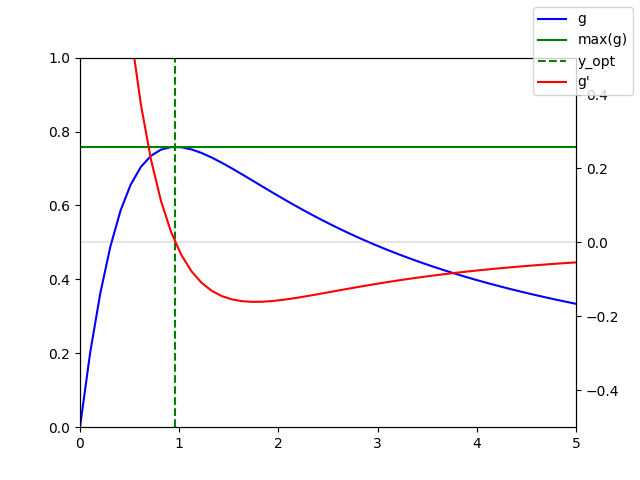

interactive(children=(FloatSlider(value=1.0, description='rate', max=2.0, min=0.1), FloatSlider(value=1.500000…

In [40]:
plot_g_lower()

## Summary

In [52]:
@np.vectorize
def lower_bound(s, lam_x, lam_y):
    maximum = optimize.minimize_scalar(negative_g_lower_scalar, args=(s, lam_x, lam_y))
    return -maximum.fun

def plot_bounds():
    fig, ax1 = plt.subplots()
    rate = np.logspace(-3, 1)
    s = 2**rate - 1
    curves = {"lower": lower_bound}
    plots = {k: ax1.loglog(rate, np.ones(len(rate)), label=k)[0] for k in curves.keys()}
    ax1.set_xlim([1e-3, 1e1])
    ax1.set_ylim([1e-5, 1])
    fig.legend()
    def update_plot(lam_x, lam_y):
        for _name, _func in curves.items():
            plots[_name].set_ydata(_func(s, lam_x, lam_y))
    interact(update_plot, lam_x=(.5, 3, .1), lam_y=(.5, 3, .1))

<IPython.core.display.Javascript object>


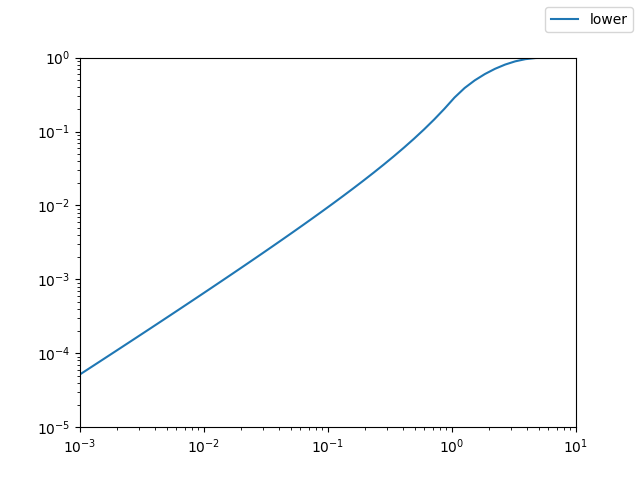

interactive(children=(FloatSlider(value=1.7000000000000002, description='lam_x', max=3.0, min=0.5), FloatSlide…

In [53]:
plot_bounds()